# HDR Image

HDR is abbreviated as High Dynamic Range. An HDR image is the final merged result of multiple exposed images. The standard way of creating an HDR image is by combining multiple exposed images into single image.

## Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

## Downloading the images

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/qa1hsyxt66pvj02/opencv_bootcamp_assets_NB10.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd()+"/images", "opencv_bootcamp_assets_NB10.zip")
# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

## Reading the images

Text(0.5, 1.0, '15.jpg')

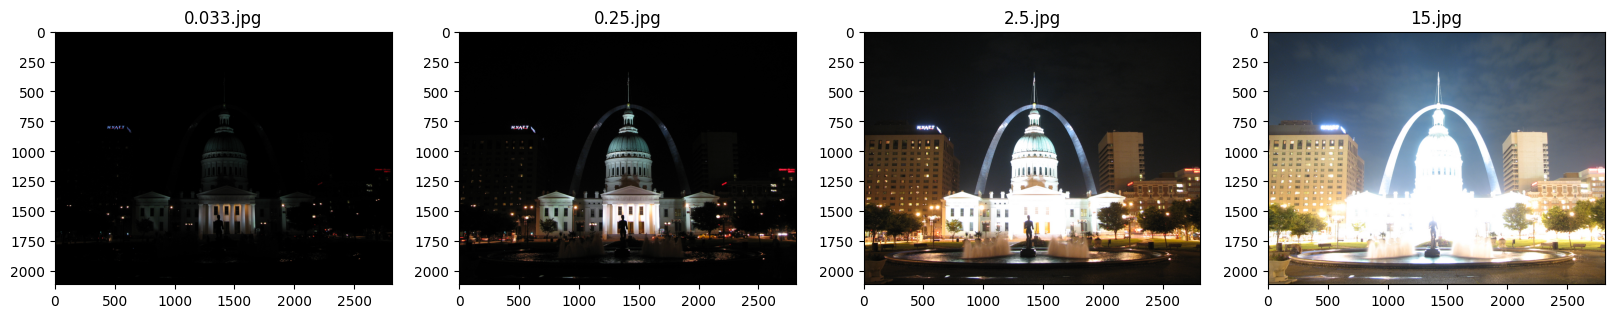

In [4]:
filenames = ["images/img_0.033.jpg", "images/img_0.25.jpg", "images/img_2.5.jpg", "images/img_15.jpg"]

images_bgr = [cv2.imread(filename) for filename in filenames]
images_rgb = [cv2.cvtColor(image,cv2.COLOR_BGR2RGB) for image in images_bgr]

plt.figure(figsize=(20,10))
plt.subplot(141);plt.imshow(images_rgb[0]);plt.title("0.033.jpg")
plt.subplot(142);plt.imshow(images_rgb[1]);plt.title("0.25.jpg")
plt.subplot(143);plt.imshow(images_rgb[2]);plt.title("2.5.jpg")
plt.subplot(144);plt.imshow(images_rgb[3]);plt.title("15.jpg")

To get the exposure data from the image, you can use `PIL.Image._getexif()` function to get the metadata of the image.

In [6]:
# the course provided the exposure time
exposure_times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

## Aligning the images

We need to align the images before mergining into single HDR image, it can be done by `cv2.createAlignMTB()` 

In [7]:
alignMTB = cv2.createAlignMTB()

alignMTB.process(images_rgb,images_rgb)

## Merging images into HDR

To merge the image into HDR we use `cv2.createMergeDebevec()`

In [9]:
mergeDebevec = cv2.createMergeDebevec()
hdr_image_rgb = mergeDebevec.process(images_rgb,times = exposure_times,response = None)

## Toneing Down the image

Now the `hdr_image_rgb` contains high dynamic range photo, it can't be viewed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0940781..6375.3413].


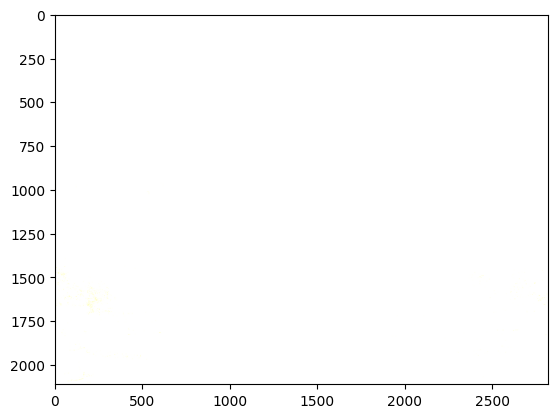

In [10]:
plt.imshow(hdr_image_rgb)

SO we are toning down that converting high dynamic range picture to low dynamic range for display We use `cv2.createTonemapReinhard` and there are multiple toning algorithm and they are `TonemapDrago`, `TonemapMantiuk`.

In [11]:
tonemap = cv2.createTonemapReinhard(gamma = 1.0, intensity = 0.0, light_adapt = 0.8, color_adapt = 0.0)
ldr_rgb = tonemap.process(hdr_image_rgb) # converting into low dynamic range pic
ldr_scaled_rgb = np.clip(ldr_rgb * 255,0,255).astype(np.uint8)

## Display the image

True

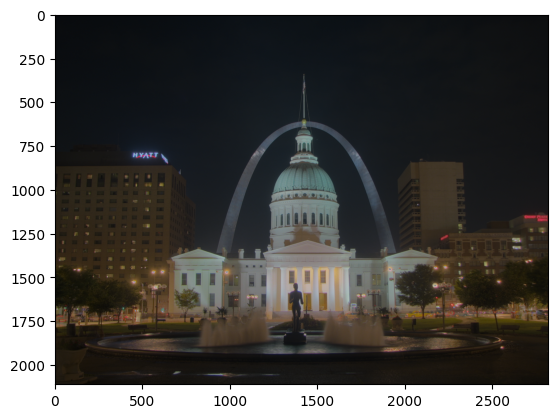

In [12]:
plt.imshow(ldr_scaled_rgb)
cv2.imwrite("images/ldr_scaled.png",ldr_scaled_rgb)
cv2.imwrite("images/hdr_raw.hdr",hdr_image_rgb)